# Euphoria Project: Understanding Island Happiness
Made only by Matteo Bruni

## Context
In the virtual world of **Euphoria**, an expansive digital archipelago, each island offers unique experiences and environments to its inhabitants. This project aims to explore and understand the characteristics that contribute to the happiness of island residents. By segmenting islands based on happiness levels, we can help similar travelers find their ideal destinations within Euphoria.

### Goals
- Identify key factors influencing the happiness levels on different islands.
- Segment islands to create traveler profiles, matching visitors to islands with similar features and happiness scores.
- Explore geographic, environmental, and amenity-based patterns to understand how these elements correlate with happiness and loyalty.

### Key Metrics
- **Happiness Index**: A measure of overall happiness among island inhabitants.
- **Loyalty Score**: Indicates retention and loyalty of visitors or residents on each island.
- **Total Refunds Requested**: Serves as an indirect measure of satisfaction or dissatisfaction.
- **Average Time in Euphoria**: Reflects the typical duration visitors spend on each island, indicating attraction levels.
- **Geographical Features**: Variables such as region, fauna-friendliness, and availability of water sources.

These metrics and characteristics will guide our exploratory data analysis (EDA) and inform our approach to clustering islands based on their happiness levels.


### Research Questions

1. What factors have the strongest influence on the `happiness_index`?
2. Are there common characteristics among high-happiness islands that can be used to create a profile for such islands?
3. How do geographic and amenity-based factors (e.g., `region`, `features`, `water_sources`) relate to happiness and loyalty?
4. Are there distinct clusters of islands with similar happiness levels, and what differentiates these clusters?
5. Can we identify outlier islands with unusually high or low happiness levels, and what factors contribute to these extremes?

## Exploratory Data Analysis (EDA)

In this EDA, we’ll explore each feature to understand its distribution, identify potential outliers, and examine relationships with the `happiness_index` and `loyalty_score`. The analysis will focus on discovering patterns that differentiate islands by happiness levels, as well as exploring geographic and amenity-related influences on island satisfaction.

### Load and Inspect the Dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)  # Allow full column width display
pd.set_option('display.colheader_justify', 'right')  # Align column headers to the left (for header alignment only)
pd.set_option('display.width', 1000)         # Set a larger width for the entire display

euphoria = pd.read_csv('euphoria.csv')
print(euphoria.head())

   referral_friends  water_sources  shelters fauna_friendly  island_size  creation_time region happiness_metric                                                                                           features  happiness_index  loyalty_score  total_refunds_requested trade_goods  x_coordinate  avg_time_in_euphoria  y_coordinate     island_id entry_fee  nearest_city
0               3.0            2.0       2.0      Cats,Dogs        892.0   1.568754e+09     TX          Monthly                                  AC,Clubhouse,Fireplace,Parking,Patio/Deck,Playground,Pool,Storage           1014.0            2.0                      1.0         USD       32.8239                 39.84      -96.6810  5.508811e+09        No        Dallas
1               2.0            2.0       3.0            NaN       1322.0   1.553720e+09     PA          Monthly                                                                                            Parking           2700.0            2.0                      

In [23]:
print(euphoria.describe(include='all'))

        referral_friends  water_sources      shelters fauna_friendly   island_size  creation_time region happiness_metric features  happiness_index  loyalty_score  total_refunds_requested trade_goods  x_coordinate  avg_time_in_euphoria  y_coordinate     island_id entry_fee nearest_city
count       89572.000000   89536.000000  89382.000000          35163  89578.000000   8.946200e+04  89306            89566    75035     89455.000000   89546.000000             89705.000000       89673  89491.000000          89526.000000  89393.000000  8.952000e+04     89366        89253
unique               NaN            NaN           NaN              4           NaN            NaN     51                2     9404              NaN            NaN                      NaN           1           NaN                   NaN           NaN           NaN         2         2877
top                  NaN            NaN           NaN      Cats,Dogs           NaN            NaN     TX          Monthly  Parking         

## Handling Missing Values

Missing values in the dataset can distort the analysis, especially during correlation calculations or when applying machine learning models. To ensure accurate results, we need to handle null values appropriately.

### Steps to Handle Missing Values:
1. Inspect the missing values in the dataset.
2. Decide on a handling strategy:
   - Impute missing values (mean, median, or mode for numerical columns; mode or "Unknown" for categorical columns).
   - Drop columns or rows with excessive missing data if they are not critical to the analysis.
3. Verify the dataset after handling missing values to ensure no nulls remain.


In [24]:
# Check the total number and percentage of missing values in each column
missing_values = euphoria.isnull().sum()
missing_percentage = (missing_values / len(euphoria)) * 100

# Combine into a DataFrame for better visualization
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)
print(missing_df)

                         Missing Values  Percentage
fauna_friendly                    64329   64.657460
features                          24457   24.581876
nearest_city                      10239   10.291280
region                            10186   10.238009
entry_fee                         10126   10.177703
shelters                          10110   10.161621
y_coordinate                      10099   10.150565
happiness_index                   10037   10.088248
creation_time                     10030   10.081213
x_coordinate                      10001   10.052064
island_id                          9972   10.022916
avg_time_in_euphoria               9966   10.016886
water_sources                      9956   10.006835
loyalty_score                      9946    9.996784
happiness_metric                   9926    9.976682
referral_friends                   9920    9.970651
island_size                        9914    9.964620
trade_goods                        9819    9.869135
total_refund

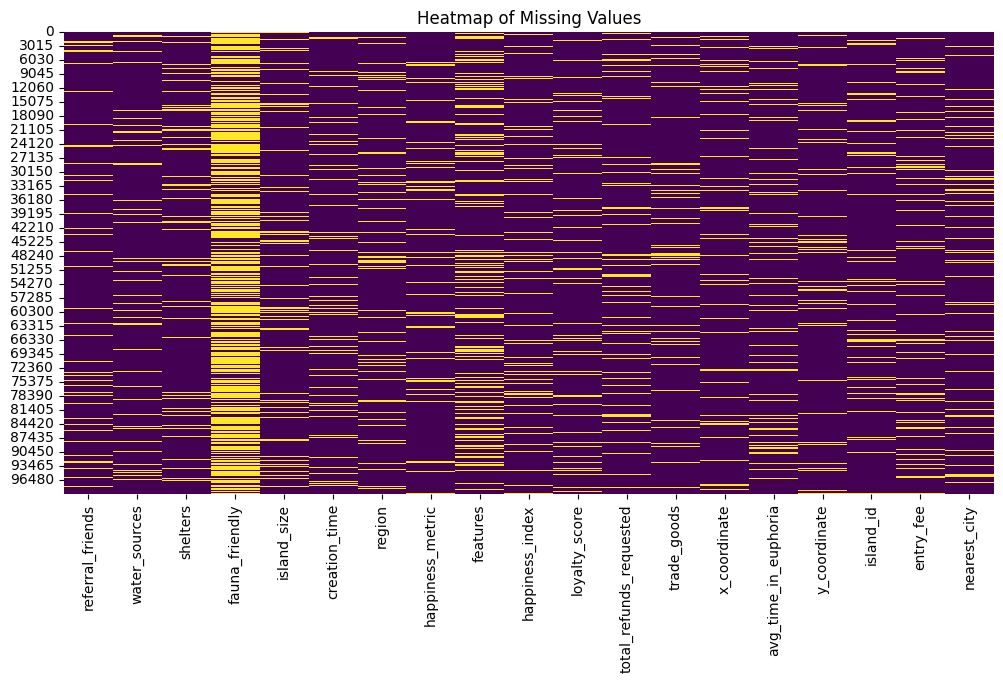

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(euphoria.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

### Imputation Strategy

We will handle missing values as follows:
- **Numerical Columns**:
  - Impute missing values with the column mean or median.
- **Categorical Columns**:
  - Fill missing values with the most frequent category (mode) or a placeholder like "Unknown".


In [26]:
# Impute numerical columns with the mean value
numerical_columns = ['happiness_index', 'loyalty_score', 'avg_time_in_euphoria', 'total_refunds_requested', 'island_size']
for col in numerical_columns:
    euphoria[col] = euphoria[col].fillna(euphoria[col].mean())

# Impute categorical columns with 'Unknown' or the mode
categorical_columns = ['region', 'fauna_friendly', 'features']
for col in categorical_columns:
    euphoria[col] = euphoria[col].fillna('Unknown')

# Re-check for missing values after imputation
missing_values_after = euphoria.isnull().sum()
missing_percentage_after = (missing_values_after / len(euphoria)) * 100

# Combine into a DataFrame for better visualization
missing_df_after = pd.DataFrame({
    'Missing Values': missing_values_after,
    'Percentage': missing_percentage_after
}).sort_values(by='Percentage', ascending=False)

# Display the updated missing values
print(missing_df_after)

                         Missing Values  Percentage
nearest_city                      10239   10.291280
entry_fee                         10126   10.177703
shelters                          10110   10.161621
y_coordinate                      10099   10.150565
creation_time                     10030   10.081213
x_coordinate                      10001   10.052064
island_id                          9972   10.022916
water_sources                      9956   10.006835
happiness_metric                   9926    9.976682
referral_friends                   9920    9.970651
trade_goods                        9819    9.869135
loyalty_score                         0    0.000000
total_refunds_requested               0    0.000000
features                              0    0.000000
avg_time_in_euphoria                  0    0.000000
region                                0    0.000000
island_size                           0    0.000000
fauna_friendly                        0    0.000000
happiness_in

### Explanation of Missing Value Handling

1. **Numerical Imputation**:
   - We chose to fill missing numerical values with the mean because it minimizes distortion in the overall distribution of the data.
   - Alternatively, median imputation could be used if the data is heavily skewed.

2. **Categorical Imputation**:
   - Missing values in categorical columns were filled with "Unknown" to preserve all rows and ensure no information is lost.
   - The mode could also be used for categorical imputation if a dominant category exists.

3. **Outcome**:
   - All missing values have been imputed. The dataset is now ready for further analysis, such as correlation calculations or modeling.

By handling missing values, we ensure that no rows are excluded during analysis, improving the robustness of our results.

### Summary of Data Types
This dataset provides a mix of **quantitative** and **qualitative** information, allowing for analyses on island size, visitor happiness, amenities, and geographic patterns. The combination of happiness metrics, amenities, and loyalty data makes it suitable for segmentation and understanding visitor preferences.
- **Numerical**: `referral_friends`, `water_sources`, `shelters`, `island_size`, `creation_time`, `happiness_index`, `loyalty_score`, `total_refunds_requested`, `x_coordinate`, `avg_time_in_euphoria`, `y_coordinate`, `island_id`
- **Categorical**: `fauna_friendly`, `region`, `happiness_metric`, `features`, `trade_goods`, `entry_fee`, `nearest_city`

#### 1. What Factors Influence the `Happiness Index`?

- **Objective**: Explore how features such as `loyalty_score`, `avg_time_in_euphoria`, `total_refunds_requested`, and `entry_fee` correlate with `happiness_index`.
- **Method**: Calculate correlations and create scatter plots.

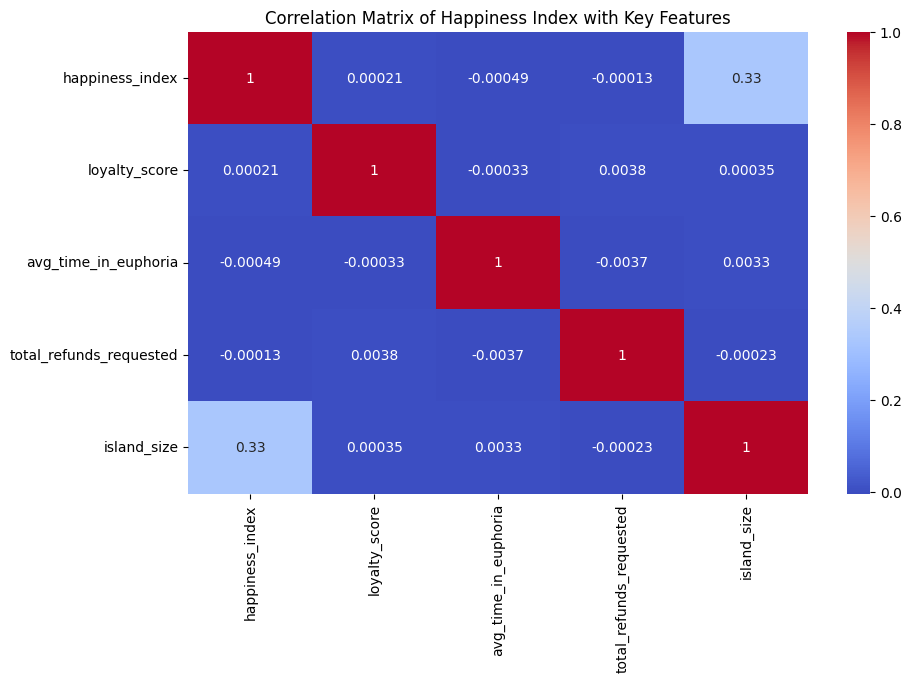

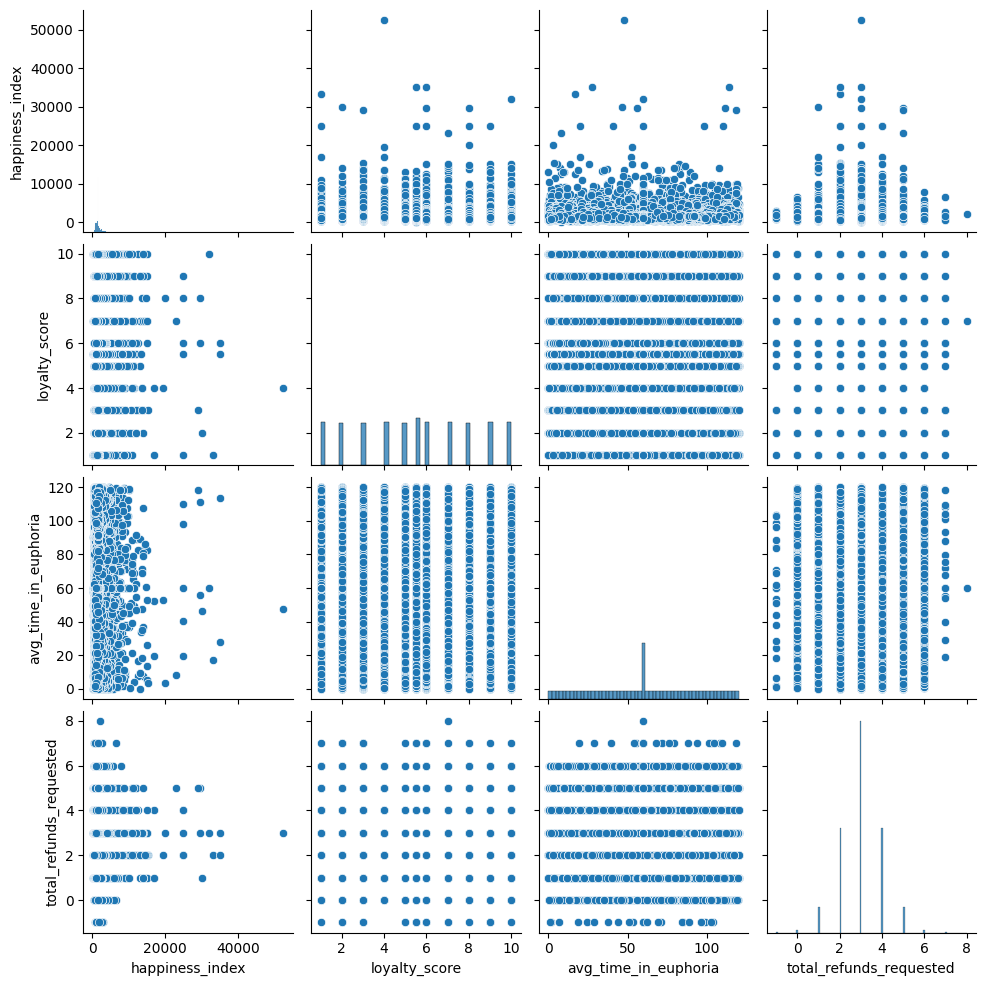

In [27]:
# Correlation matrix to examine relationships
correlation_matrix = euphoria[['happiness_index', 'loyalty_score', 'avg_time_in_euphoria', 'total_refunds_requested', 'island_size']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Happiness Index with Key Features')
plt.show()

# Scatter plots to explore relationships with happiness index
sns.pairplot(euphoria, vars=['happiness_index', 'loyalty_score', 'avg_time_in_euphoria', 'total_refunds_requested'])
plt.show()


**Analysis**:
- **Correlation Heatmap**: Look for features with high correlations to `happiness_index`.
- **Scatter Plots**: Identify trends and relationships visually, such as whether higher loyalty or longer average stay correlates with higher happiness.

#### 2. Characteristics of High-Happiness Islands

- **Objective**: Investigate common attributes of islands with high happiness scores.
- **Method**: Segment islands by happiness levels (e.g., low, medium, high) and compare characteristics.

                 loyalty_score  avg_time_in_euphoria  total_refunds_requested  island_size
happiness_level                                                                           
Low                   5.522843             59.743597                 2.999835   834.293780
Medium                5.506598             60.076278                 2.997450   958.129654
High                  5.514826             59.841214                 3.003214  1077.724985


C:\Users\matte\AppData\Local\Temp\ipykernel_34508\3348011953.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = euphoria.groupby('happiness_level')[['loyalty_score', 'avg_time_in_euphoria', 'total_refunds_requested', 'island_size']].mean()


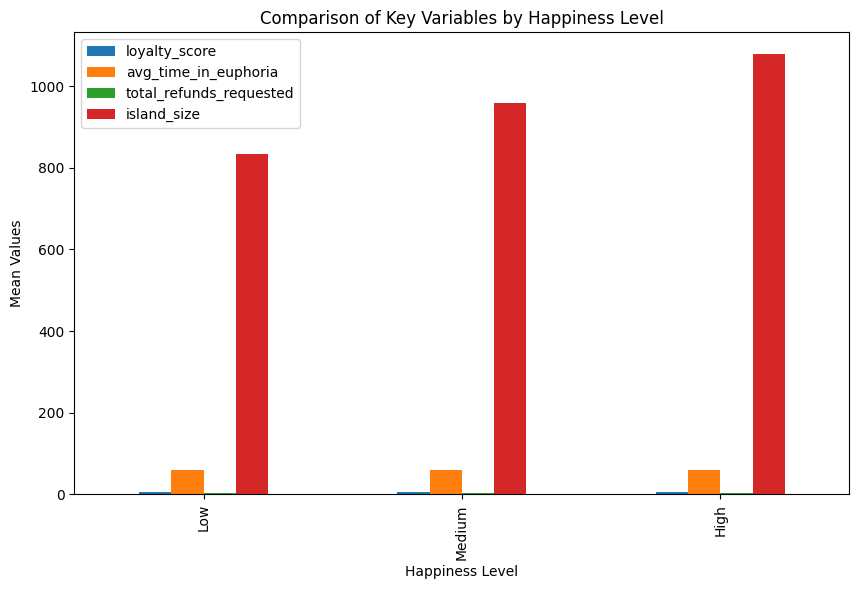

In [28]:
# Define happiness levels based on quantiles
euphoria['happiness_level'] = pd.qcut(euphoria['happiness_index'], q=3, labels=['Low', 'Medium', 'High'])

# Compare means of key variables across happiness levels
grouped = euphoria.groupby('happiness_level')[['loyalty_score', 'avg_time_in_euphoria', 'total_refunds_requested', 'island_size']].mean()
print(grouped)

# Visualize differences between happiness levels
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Key Variables by Happiness Level')
plt.xlabel('Happiness Level')
plt.ylabel('Mean Values')
plt.show()


**Analysis**:
- Look for patterns in features like `loyalty_score` and `total_refunds_requested` across happiness levels, noting any characteristics that stand out in high-happiness islands.

#### 3. Influence of Geographic and Amenity-Based Factors

- **Objective**: Explore if geographic features or amenities relate to happiness and loyalty.
- **Method**: Visualize categorical distributions and check for patterns.

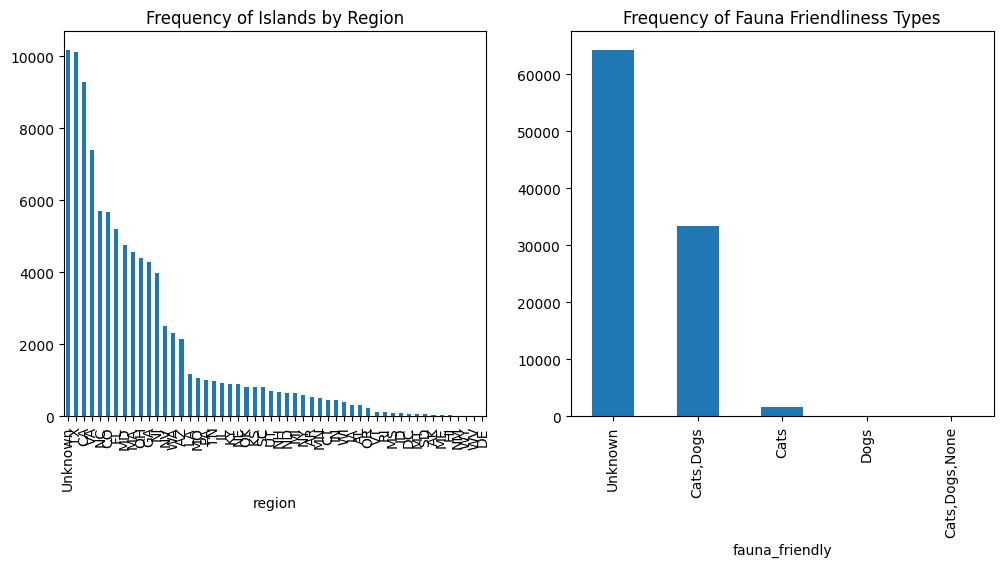

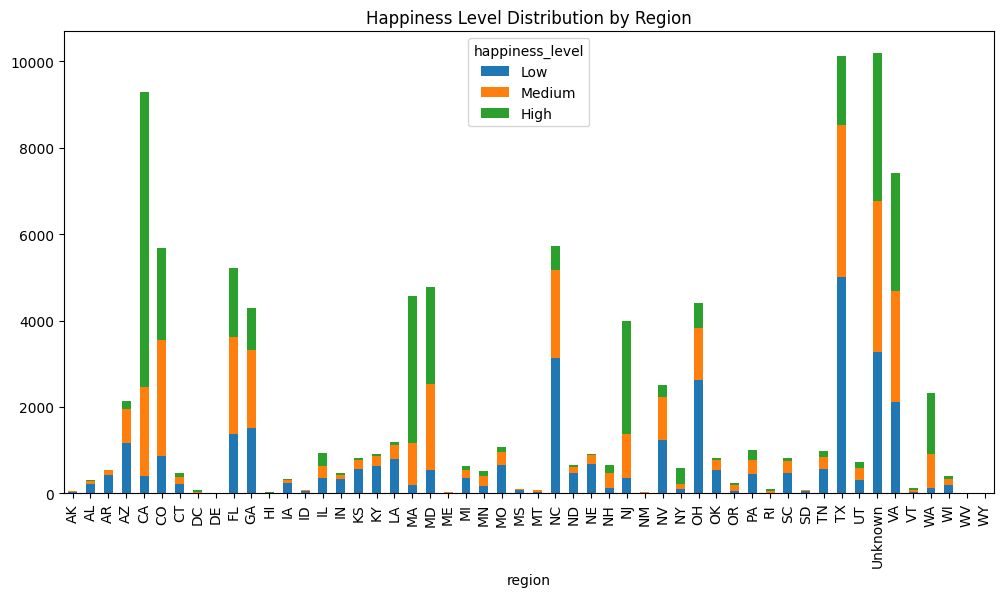

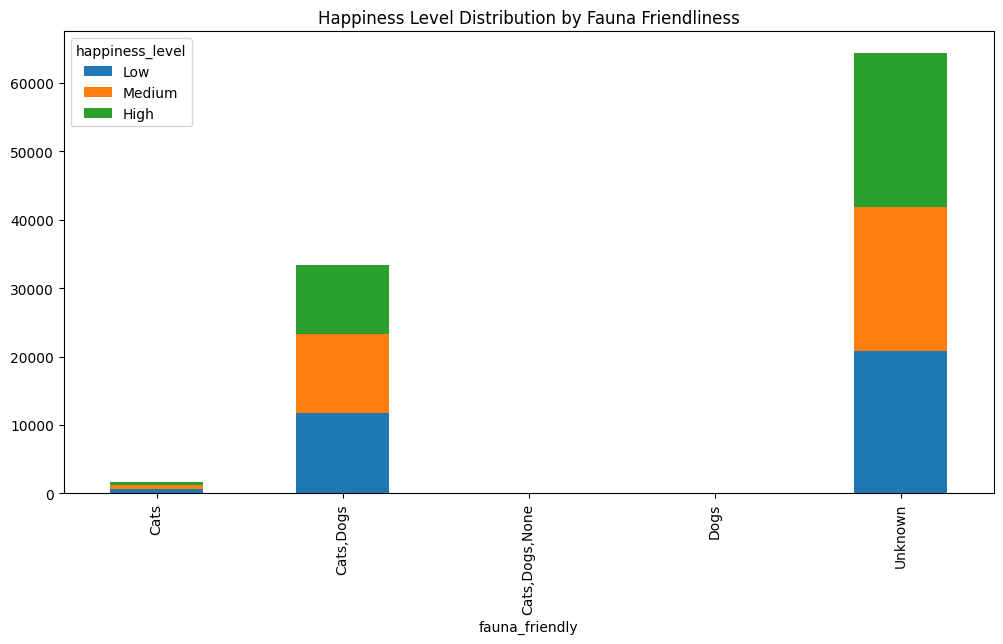

In [29]:
# Frequency counts of categorical variables
region_counts = euphoria['region'].value_counts()
fauna_counts = euphoria['fauna_friendly'].value_counts()

# Plotting region and fauna_friendly counts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
region_counts.plot(kind='bar')
plt.title('Frequency of Islands by Region')

plt.subplot(1, 2, 2)
fauna_counts.plot(kind='bar')
plt.title('Frequency of Fauna Friendliness Types')
plt.show()

# Cross-tabulation of happiness level by region and fauna friendliness
region_happiness = pd.crosstab(euphoria['region'], euphoria['happiness_level'])
fauna_happiness = pd.crosstab(euphoria['fauna_friendly'], euphoria['happiness_level'])

# Plot
region_happiness.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Happiness Level Distribution by Region')
plt.show()

fauna_happiness.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Happiness Level Distribution by Fauna Friendliness')
plt.show()

**Analysis**:
- Identify any geographic clusters or popular fauna categories that appear more in high-happiness islands.
- Cross-tabulations can reveal if certain regions or fauna types correlate with happiness levels.

#### 4. Clustering Islands by Similar Happiness Levels

- **Objective**: Apply clustering techniques (like K-Means) to group islands with similar happiness scores and features.
- **Method**: Use K-Means clustering with selected numerical features and visualize the clusters.

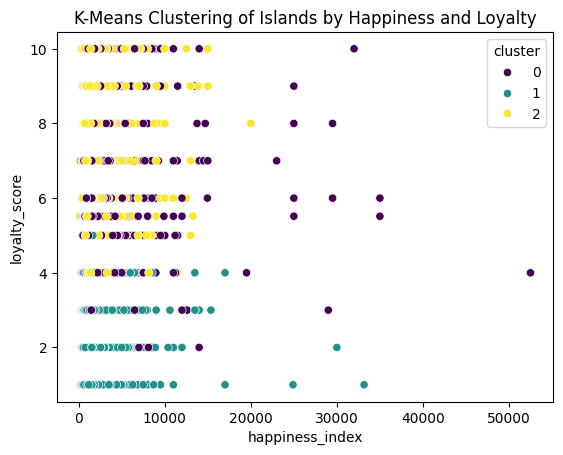

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering and standardize
features = euphoria[['happiness_index', 'loyalty_score', 'avg_time_in_euphoria', 'total_refunds_requested']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
euphoria['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters based on happiness_index and loyalty_score
sns.scatterplot(data=euphoria, x='happiness_index', y='loyalty_score', hue='cluster', palette='viridis')
plt.title('K-Means Clustering of Islands by Happiness and Loyalty')
plt.show()

**Analysis**:
- Examine the clusters and identify distinguishing characteristics for each, noting how happiness and loyalty scores vary across clusters.

#### 5. Identifying Outliers in Happiness Levels

- **Objective**: Detect outliers in `happiness_index` and explore their characteristics.
- **Method**: Use box plots or Z-scores to identify outlier islands.

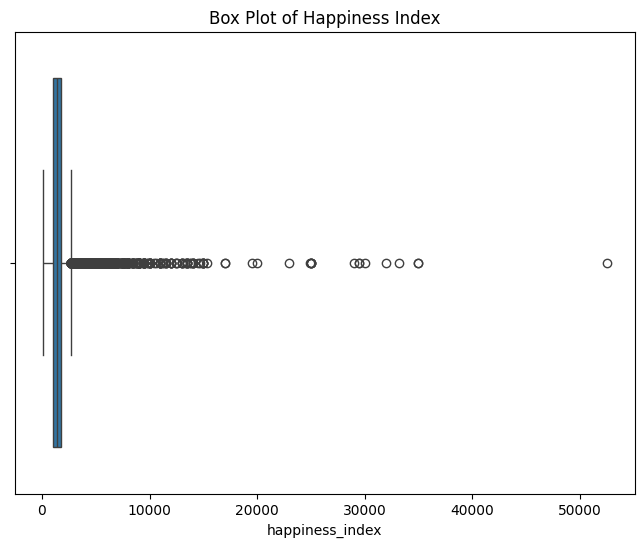

          island_id  happiness_index  loyalty_score region
13     5.121817e+09           3800.0            2.0     MI
29     5.509013e+09           2955.0            2.0     OH
34     5.198213e+09            590.0            5.0     AZ
43     5.198372e+09            650.0            7.0     KY
45     5.198562e+09            495.0            3.0     VA
...             ...              ...            ...    ...
99422  5.668621e+09            600.0            1.0     TX
99428  5.508707e+09           3895.0            3.0     MA
99478  5.664578e+09            700.0            8.0     IA
99479  5.509184e+09            400.0            6.0     NC
99480  5.197872e+09            625.0           10.0     KS

[9931 rows x 4 columns]


In [31]:
# Box plot to identify outliers in happiness_index
plt.figure(figsize=(8, 6))
sns.boxplot(data=euphoria, x='happiness_index')
plt.title('Box Plot of Happiness Index')
plt.show()

# Identify and analyze outlier islands with extreme happiness levels
outliers = euphoria[(euphoria['happiness_index'] < euphoria['happiness_index'].quantile(0.05)) |
                    (euphoria['happiness_index'] > euphoria['happiness_index'].quantile(0.95))]
print(outliers[['island_id', 'happiness_index', 'loyalty_score', 'region']])


**Analysis**:
- Examine characteristics of outlier islands to understand why they may have unusually high or low happiness levels, noting any unusual features or patterns.